## central India rainfall assignment 

In [7]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
%matplotlib inline

In [8]:
india_rainfall_distribution=pd.read_excel("Assignment_Central_India_Rainfall_1901_2016.xls") 

In [9]:
india_rainfall_distribution.head()

,YEAR,Actual Rainfall: JUN,Actual Rainfall: JUL,Actual Rainfall: AUG,Actual Rainfall: SEPT,Actual Rainfall: JUN-SEPT
0,1901,99.3,295.4,354.8,113.8,863.3
1,1902,62.3,334.2,237.6,216.0,850.0
2,1903,96.2,392.7,286.6,211.5,987.1
3,1904,180.5,259.1,200.9,165.8,806.3
4,1905,59.8,340.6,178.9,204.1,783.4


In [10]:
india_rainfall_distribution=pd.read_excel("Assignment_Central_India_Rainfall_1901_2016.xls",index_col=[0],parse_dates=[0])

In [11]:
india_rainfall_distribution.head()

,Actual Rainfall: JUN,Actual Rainfall: JUL,Actual Rainfall: AUG,Actual Rainfall: SEPT,Actual Rainfall: JUN-SEPT
YEAR,,,,,
1901-01-01,99.3,295.4,354.8,113.8,863.3
1902-01-01,62.3,334.2,237.6,216.0,850.0
1903-01-01,96.2,392.7,286.6,211.5,987.1
1904-01-01,180.5,259.1,200.9,165.8,806.3
1905-01-01,59.8,340.6,178.9,204.1,783.4


In [12]:
india_rainfall_distribution.describe()

,Actual Rainfall: JUN,Actual Rainfall: JUL,Actual Rainfall: AUG,Actual Rainfall: SEPT,Actual Rainfall: JUN-SEPT
count,116.000000,116.000000,116.000000,116.000000,116.000000
mean,165.743103,336.856897,293.796552,184.191379,981.002586
std,57.685028,73.191978,67.174744,63.309210,131.290236
min,43.600000,91.800000,169.800000,53.900000,679.900000
25%,126.050000,289.875000,238.500000,132.925000,882.725000
50%,164.800000,334.100000,294.700000,189.350000,984.450000
75%,206.850000,385.350000,347.325000,227.750000,1076.225000
max,303.700000,523.800000,465.000000,366.300000,1349.400000


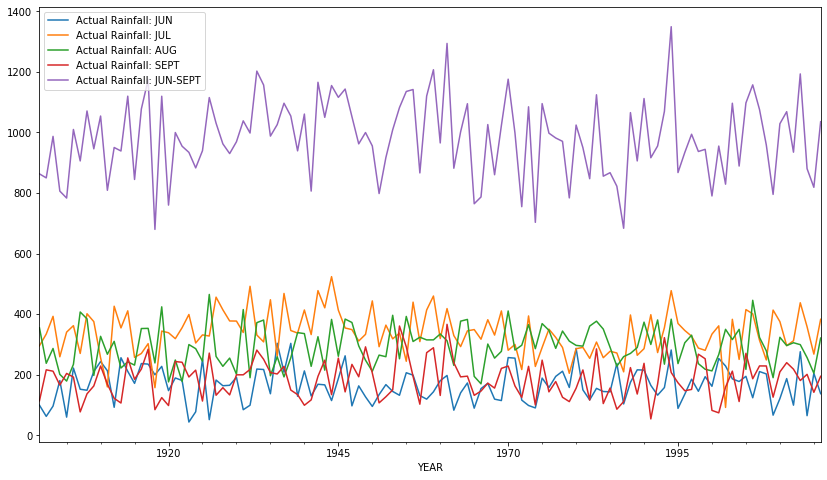

In [35]:
india_rainfall_distribution.plot(figsize=(14,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019489033988>,
      dtype=object)

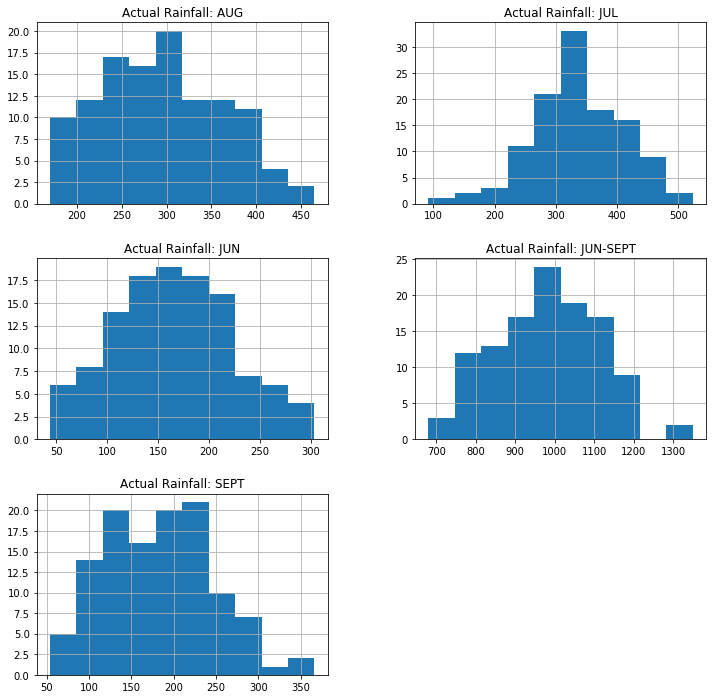

In [19]:
india_rainfall_distribution.hist(figsize=(12,12))

In [27]:
# smoothing
moving_average_rainfall=india_rainfall_distribution.rolling(window=20).mean()  #almost a stationary series.rolling(window=20).mean()  # window: This is the number of observations used for calculating the statistic. 

In [28]:
moving_average_rainfall

,Actual Rainfall: JUN,Actual Rainfall: JUL,Actual Rainfall: AUG,Actual Rainfall: SEPT,Actual Rainfall: JUN-SEPT
YEAR,,,,,
1901-01-01,NaN,NaN,NaN,NaN,NaN
1902-01-01,NaN,NaN,NaN,NaN,NaN
1903-01-01,NaN,NaN,NaN,NaN,NaN
1904-01-01,NaN,NaN,NaN,NaN,NaN
1905-01-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2012-01-01,169.960,331.945,290.970,193.335,988.700
2013-01-01,175.880,336.055,294.195,186.255,994.880
2014-01-01,165.030,330.105,287.850,185.955,971.435


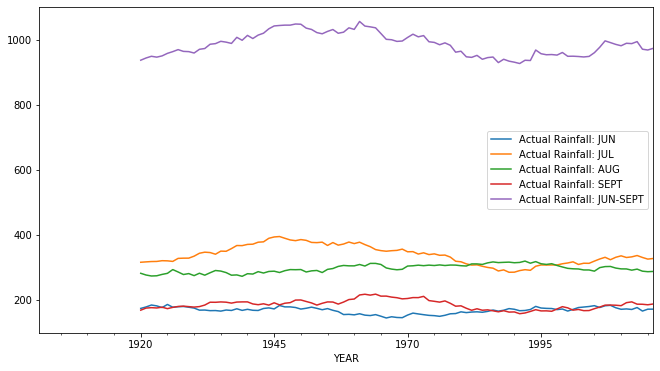

In [32]:
moving_average_rainfall.plot(figsize=(11,6)) # we can see that there is a peak between June-Septempber
#(one can infer from domain knowledge that ths can be due to monsoon session)

In [36]:
sm.stats.durbin_watson(india_rainfall_distribution) #Less correalation

array([0.22366174, 0.0876859 , 0.10664366, 0.20532435, 0.03699864])

In [40]:
training_data=india_rainfall_distribution[0:60]
test_data=india_rainfall_distribution[60:]

In [41]:
from statsmodels.tsa.arima_model import ARIMA